<a href="https://colab.research.google.com/github/mangoseeds/machine-learning/blob/main/9_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [4]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [7]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)


In [9]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0024884223937988283 (+/-0.0007643186560322385)
avg score time: 0.0035202503204345703 (+/-0.0007520868030219086)
avg test score: 0.96 (+/-0.024944382578492935)


In [10]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0467437744140625 (+/-0.015242372638665055)
avg score time: 0.019646978378295897 (+/-0.005873197587826497)
avg test score: 0.9400000000000001 (+/-0.02494438257849294)


##### 와인 데이터

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [12]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002195882797241211 (+/-0.00015266881227509146)
avg score time: 0.0034304141998291017 (+/-0.0001284903530637725)
avg test score: 0.9493650793650794 (+/-0.037910929811115976)


In [13]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06730561256408692 (+/-0.018858986046246737)
avg score time: 0.016534996032714844 (+/-0.0041744903379573135)
avg test score: 0.9607936507936508 (+/-0.022468028291073656)


##### 유방암 데이터

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [15]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.003789520263671875 (+/-0.0020589229708433045)
avg score time: 0.02206597328186035 (+/-0.01068295267016931)
avg test score: 0.9648501785437045 (+/-0.009609970350036127)


In [16]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.047185659408569336 (+/-0.013261516657414268)
avg score time: 0.026199483871459962 (+/-0.00445824368399125)
avg test score: 0.9630957925787922 (+/-0.008582913674058454)


#### SVC

##### 붓꽃 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [18]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.003473711013793945 (+/-0.0015232064223590122)
avg score time: 0.000952911376953125 (+/-4.989261825492803e-05)
avg test score: 0.9666666666666666 (+/-0.02108185106778919)


In [19]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0669827938079834 (+/-0.022625825291051137)
avg score time: 0.010678482055664063 (+/-0.00864654714053784)
avg test score: 0.9533333333333334 (+/-0.02666666666666666)


##### 와인 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.00352330207824707 (+/-9.636658359741317e-05)
avg score time: 0.001158428192138672 (+/-2.876454697222598e-05)
avg test score: 0.9833333333333334 (+/-0.022222222222222233)


In [22]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04965205192565918 (+/-0.0021883998555300645)
avg score time: 0.007117462158203125 (+/-0.00014884549609239082)
avg test score: 0.9720634920634922 (+/-0.017571077268107502)


##### 유방암 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [24]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010147190093994141 (+/-0.0007259409457598061)
avg score time: 0.002909135818481445 (+/-0.0001074947279805132)
avg test score: 0.9736376339077782 (+/-0.014678541667933545)


In [25]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0799649715423584 (+/-0.013200179307602509)
avg score time: 0.017804956436157225 (+/-0.0009065101990704829)
avg test score: 0.9648812296227295 (+/-0.00955251006540865)


#### Decision Tree

##### 붓꽃 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [27]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017858982086181641 (+/-0.00011781367661362653)
avg score time: 0.0006268978118896485 (+/-3.9046121587201026e-05)
avg test score: 0.9533333333333334 (+/-0.03399346342395189)


In [28]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04817652702331543 (+/-0.010701475596370776)
avg score time: 0.006067323684692383 (+/-0.0022347344533080655)
avg test score: 0.9466666666666667 (+/-0.03399346342395189)


##### 와인 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [30]:
cross_val = cross_validate(
    estimator = base_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005448818206787109 (+/-0.005836388625693411)
avg score time: 0.0007266998291015625 (+/-0.0001131479416285225)
avg test score: 0.8876190476190475 (+/-0.04989432016453655)


In [31]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = wine.data, y = wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04661660194396973 (+/-0.005026004591581531)
avg score time: 0.007207632064819336 (+/-0.0035228882632053304)
avg test score: 0.9333333333333332 (+/-0.07576767609436587)


##### 유방암 데이터

In [32]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [33]:
cross_val = cross_validate(
    estimator = base_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.012973451614379882 (+/-0.001210882110350962)
avg score time: 0.000995779037475586 (+/-4.222677755422378e-05)
avg test score: 0.9173420276354604 (+/-0.0207725916825084)


In [34]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = cancer.data, y = cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06812224388122559 (+/-0.011988681496022884)
avg score time: 0.0054053783416748045 (+/-0.00047590977131742806)
avg test score: 0.9507840397453812 (+/-0.00898404363246657)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [35]:
diabetes = load_diabetes()

#### KNN

##### 당뇨병 데이터

In [39]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [40]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0045359134674072266 (+/-0.003973254234689187)
avg score time: 0.0027182579040527345 (+/-0.00024669848620133955)
avg test score: 0.3689720650295623 (+/-0.044659049060165365)


In [41]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.044400930404663086 (+/-0.01078057426057213)
avg score time: 0.018311166763305665 (+/-0.006038100738953729)
avg test score: 0.37746205144473705 (+/-0.04709451951171743)


#### SVR

##### 당뇨병 데이터

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [43]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.017036628723144532 (+/-0.000792118442673959)
avg score time: 0.005010223388671875 (+/-7.366749836798421e-05)
avg test score: 0.14659936199629434 (+/-0.02190798003342928)


In [44]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0822746753692627 (+/-0.0036114720534643034)
avg score time: 0.02422809600830078 (+/-0.0028732739136307986)
avg test score: 0.0641654748776626 (+/-0.025613710081611785)


#### Decision Tree

##### 당뇨병 데이터

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [46]:
cross_val = cross_validate(
    estimator = base_model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0050105094909667965 (+/-0.00017670336976213788)
avg score time: 0.0010234832763671875 (+/-0.00016865740396692353)
avg test score: -0.08562065463239103 (+/-0.14085301787763083)


In [47]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05271081924438477 (+/-0.007138652531327475)
avg score time: 0.004832696914672851 (+/-0.000314914082515031)
avg test score: 0.37737592856941127 (+/-0.11196692568408152)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [48]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [49]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [50]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13554234504699708 (+/-0.006447507131964829)
avg score time: 0.013187932968139648 (+/-0.002937284651337803)
avg test score: 0.96 (+/-0.024944382578492935)


In [51]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y= wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13839101791381836 (+/-0.004740224154614372)
avg score time: 0.010591506958007812 (+/-5.592529474718375e-05)
avg test score: 0.9666666666666666 (+/-0.03239417719358502)


In [52]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y= cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20843152999877929 (+/-0.002760611857227252)
avg score time: 0.013542652130126953 (+/-0.0028138549420920686)
avg test score: 0.9631268436578171 (+/-0.02564116998791982)


### Random Forests 회귀

In [53]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [54]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2527811050415039 (+/-0.009228089985738416)
avg score time: 0.010773229598999023 (+/-0.0024611269179196575)
avg test score: 0.4173563755572028 (+/-0.04616501164059203)


In [55]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2577629089355469 (+/-0.0049446893093512394)
avg score time: 0.00944662094116211 (+/-0.00014464153911302694)
avg test score: 0.41895597451183225 (+/-0.04443898552363667)


### Extremely Randomized Trees 분류

In [56]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [57]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09972772598266602 (+/-0.004750942019916856)
avg score time: 0.012307167053222656 (+/-0.002708423208996547)
avg test score: 0.9466666666666667 (+/-0.039999999999999994)


In [58]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y= wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10297346115112305 (+/-0.007077197137960495)
avg score time: 0.011299514770507812 (+/-0.0004940062323965334)
avg test score: 0.9944444444444445 (+/-0.011111111111111117)


In [59]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y= cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1167151927947998 (+/-0.005101023084409521)
avg score time: 0.012257862091064452 (+/-0.0002524650527809219)
avg test score: 0.9683589504735289 (+/-0.011917770620739763)


### Extremely Randomized Trees 회귀

In [60]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [61]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1620551109313965 (+/-0.007774858294238788)
avg score time: 0.010234498977661132 (+/-0.0003935475643384622)
avg test score: 0.42581080657487647 (+/-0.04467348601953782)


In [62]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15768613815307617 (+/-0.0033892304891910436)
avg score time: 0.010635995864868164 (+/-0.000763588608302541)
avg test score: 0.4410946827491277 (+/-0.029756061717127386)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [63]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [64]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [65]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth = None),
          RandomForestClassifier(n_estimators = n_estimators),
          ExtraTreesClassifier(n_estimators = n_estimators)]

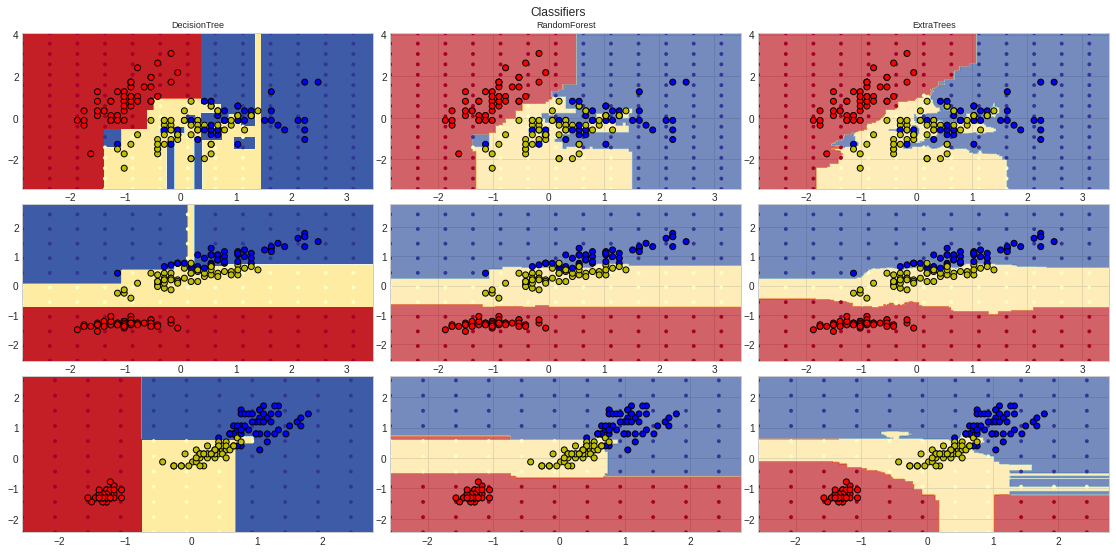

In [66]:
plt.figure(figsize = (16,8))

for pair in ([0,1], [0,2], [2,3]):
  for model in models:
    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - mean) / std

    model.fit(X, y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap = cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha = estimator_alpha, cmap = cmap)
    
    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s = 15, c = Z_points_coarser, cmap= cmap,
                            edgecolors = 'none')
    plt.scatter(X[:, 0], X[:, 1], c = y,
                cmap = ListedColormap(['r','y','b']),
                edgecolors = 'k')
    plot_idx += 1


plt.suptitle('Classifiers', fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2, pad = 2.5)
plt.show()


In [67]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth = None),
          RandomForestRegressor(n_estimators = n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

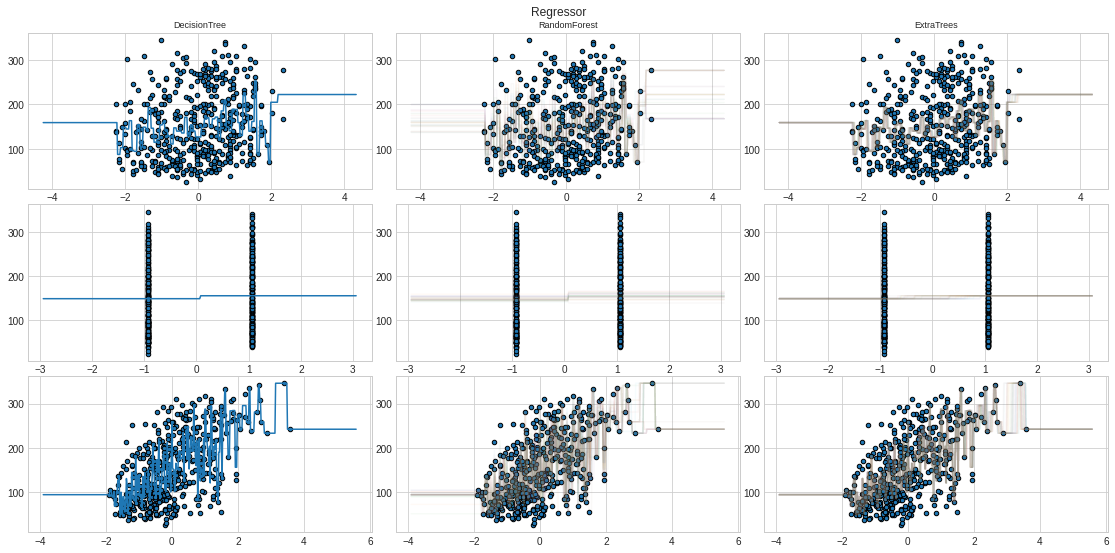

In [68]:
plt.figure(figsize= (16,8))

for pair in (0,1,2):
  for model in models:
    X = diabetes.data[:, pair]
    y = diabetes.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis = 0)
    std = X.std(axis = 0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len("Regressor")]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize = 9)
    
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.arange(x_min - 1, x_max + 1, plot_step), np.arange(y_min - 1, y_max + 1, plot_step)

    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx, Z, alpha = estimator_alpha)
    
    plt.scatter(X, y, edgecolors = 'k', s = 20)
    plot_idx += 1

plt.suptitle("Regressor", fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad = 0.2, w_pad = 0.2, pad = 2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [70]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [71]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0806704044342041 (+/-0.01173611850248643)
avg score time: 0.008583641052246094 (+/-0.0028100848755987)
avg test score: 0.9466666666666667 (+/-0.03399346342395189)


In [72]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y= wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08046512603759766 (+/-0.004311819964777412)
avg score time: 0.008233070373535156 (+/-0.0013165577387584657)
avg test score: 0.8085714285714285 (+/-0.16822356718459935)


In [73]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y= cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16289167404174804 (+/-0.005275510856744661)
avg score time: 0.00994558334350586 (+/-0.002906199846191749)
avg test score: 0.9718677224033534 (+/-0.0195587047134823)


### AdaBoost 회귀

In [74]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [75]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09440422058105469 (+/-0.005621862251540839)
avg score time: 0.005379533767700196 (+/-0.0013155893693515357)
avg test score: 0.41145444364208883 (+/-0.04793472087928767)


In [76]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0822382926940918 (+/-0.018441772379687582)
avg score time: 0.003669261932373047 (+/-0.0009188925467334113)
avg test score: 0.4167610978042232 (+/-0.0485731812093086)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [78]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [79]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2238142967224121 (+/-0.00855974792632526)
avg score time: 0.0011329174041748047 (+/-4.4692235167259586e-05)
avg test score: 0.9666666666666668 (+/-0.02108185106778919)


In [80]:
cross_val = cross_validate(
    estimator = model,
    X = wine.data, y= wine.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3479736328125 (+/-0.00588594255860453)
avg score time: 0.0012103080749511718 (+/-0.00014278383711049)
avg test score: 0.9385714285714286 (+/-0.032068206474093704)


In [81]:
cross_val = cross_validate(
    estimator = model,
    X = cancer.data, y= cancer.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.4186854839324951 (+/-0.006139862942691763)
avg score time: 0.0011511802673339843 (+/-0.00011227886016994753)
avg test score: 0.9596180717279925 (+/-0.025152111941731697)


### Gradient Tree Boosting 회귀

In [82]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [83]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10320534706115722 (+/-0.004633540499734448)
avg score time: 0.0009994983673095703 (+/-2.714472743625096e-05)
avg test score: 0.40914073028183207 (+/-0.06841704650900195)


In [84]:
cross_val = cross_validate(
    estimator = model,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1049612045288086 (+/-0.0024922672059051894)
avg score time: 0.0011165142059326172 (+/-0.0002194757176258165)
avg test score: 0.40602415154550114 (+/-0.07095051117023034)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [85]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [86]:
# hard voting
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [87]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv = 5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


In [88]:
# soft voting
model1 = SVC(probability = True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'soft',
    weights = [2,1,2] #가중치
)

In [89]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv = 5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [91]:
X = iris.data[:, [0,2]]
y = iris.target

In [92]:
model1 = DecisionTreeClassifier(max_depth = 4)
model2 = KNeighborsClassifier(n_neighbors = 7)
model3 = SVC(gamma = 0.1, kernel = 'rbf', probability=True)
vote_model = VotingClassifier(estimators = [('dt', model1), ('knn', model2), ('svc', model3)],
                              voting = 'soft', weights = [2,1,2])
model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [93]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

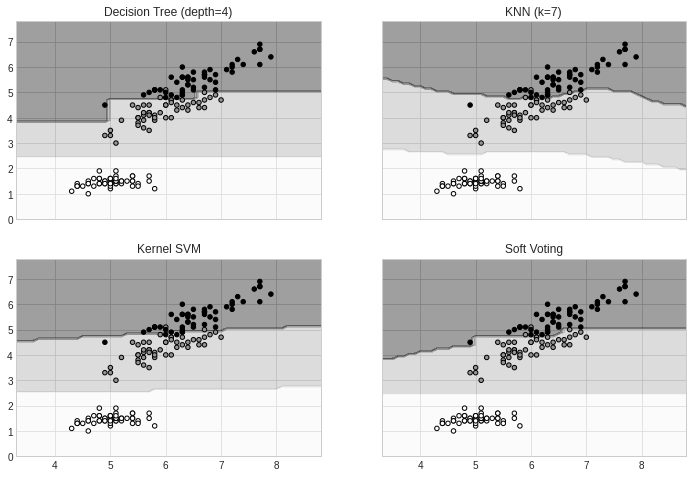

In [94]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (12,8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)', 'Kernel SVM', 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx,yy,Z,alpha = 0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [96]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights = [1,1,1]
)

In [97]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, diabetes.data, diabetes.target, cv = 5)
  print('R2: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2: 0.48 (+/- 0.05) [LinearRegression]
R2: 0.40 (+/- 0.07) [GradientBoostingRegressor]
R2: 0.42 (+/- 0.04) [RandomForestRegressor]
R2: 0.47 (+/- 0.05) [VotingRegressor]


### 회귀식 시각화

In [98]:
X = diabetes.data[:, 0].reshape(-1,1)
y = diabetes.target

In [99]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights = [1,1,1]
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [100]:
x_min, x_max = X.min()-1, X.max() + 1
xx = np.arange(x_min-1, x_max + 1)

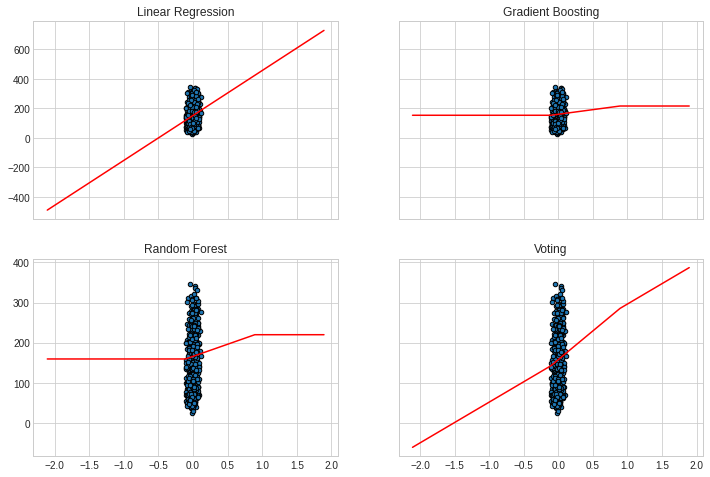

In [101]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [102]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [103]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [104]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [105]:
cross_val = cross_validate(
    estimator = reg,
    X = diabetes.data, y= diabetes.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.13194785118103028 (+/-0.005530937985057251)
avg score time: 0.0037981986999511717 (+/-0.0007270157651648381)
avg test score: 0.3675713178805702 (+/-0.07186754981128161)


#### 회귀식 시각화

In [106]:
X = diabetes.data[:, 0].reshape(-1,1)
y = diabetes.target

In [107]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

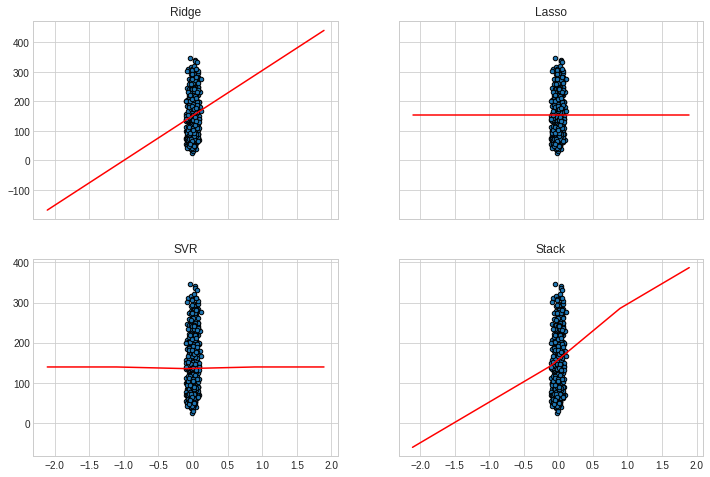

In [108]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [110]:
estimators = [('logistic', LogisticRegression(max_iter = 10000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [111]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

In [112]:
cross_val = cross_validate(
    estimator = clf,
    X = iris.data, y= iris.target,
    cv = 5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.3257561206817627 (+/-0.01729497403196724)
avg score time: 0.013468694686889649 (+/-0.003093194488525707)
avg test score: 0.9733333333333334 (+/-0.02494438257849294)


#### 결정 경계 시각화

In [113]:
X = iris.data[:, [0,2]]
y = iris.target

In [114]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
        estimators = estimators,
        final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [115]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

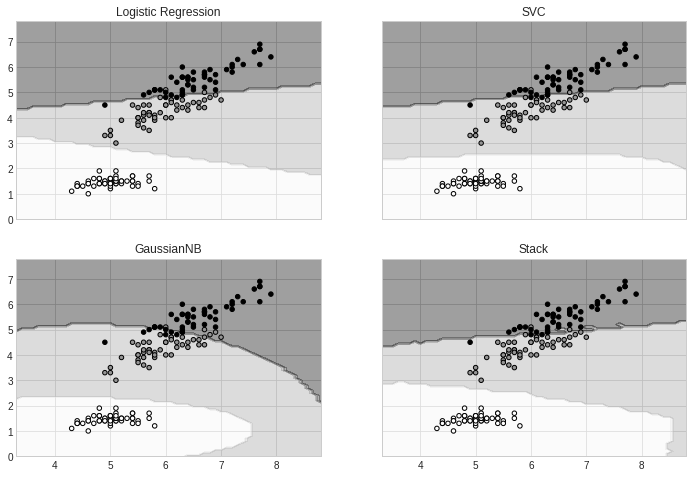

In [116]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', 'GaussianNB', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z,alpha = 0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:,1],  c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()